## Metropolis Hastings Algorithm

Metropolis–Hastings algorithm is a Markov chain Monte Carlo (MCMC) method for obtaining a sequence of random samples from a probability distribution from which direct sampling is difficult. This sequence can be used to approximate the distribution (e.g. to generate a histogram) or to compute an integral (e.g. an expected value). 

[1]https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm

### Poisson distribution

Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.

#### Probability Mass Function

A discrete random variable X is said to have a Poisson distribution, with parameter lambda >0, if it has a probability mass function given by:

P(k;lambda) : Pr(X=k) = lambda ^k * e ^ -lambda / k!
where

k is the number of occurrences 
e is Euler's number
! is the factorial function.

### Problem statement

For the given set of Input numbers , compute expected value of rate (lambda) by Posteriors of possion distribution using Metropolis-hastings algorithm

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#input data
data = [0,0,1,2,0,2,2,1,1]
accepted = []
posteriors = []

In [3]:
# function to compute Poisson Distribution
def Poisson_distribution(event,interval):
    numerator = (interval**event)*(math.e**-interval)
    denominator = math.factorial(event)
    p = numerator/denominator
    return p

### Posterior probability

Posterior probability is the probability an event will happen after all evidence or background information has been taken into account. It is closely related to prior probability, which is the probability an event will happen before you taken any new evidence into account

In [4]:
# function to compute posterior probability
def compute_posterior(lamda,inputs):
    p=1
    for event in inputs:
        f = Poisson_distribution(event,lamda)
        p = p*f
    posterior = lamda * p
    return posterior

### Metropolis-Hastings Algorithm

The MH algorithm for sampling from a target distribution π, using transition kernel Q, consists of the following steps:

* Initialize, X1=x1 say.
* For t=1,2,…

 * sample y from Q(y|xt). Think of y as a “proposed” value for xt+1.
 * Compute
    A=min(1,π(y)Q(xt|y)π(xt)Q(y|xt)).
    A is often called the “acceptance probabilty”.
 * with probability A “accept” the proposed value, and set xt+1=y. Otherwise set xt+1=xt

In [5]:
def Metropolis_hastings(old_value,new_value):
    ratio = new_value/old_value
    if(ratio >= 1):
        accepted.append(new_value)
        posteriors.append(compute_posterior(new_value,data))
        return new_value
    elif(ratio <1):
        u = np.random.uniform(0,1,1)
        if(u<ratio):
            accepted.append(new_value)
            posteriors.append(compute_posterior(new_value,data))
            return new_value
        else:
            return old_value

In [6]:
# function for scatter plot
def graph_plot(x,y):
    plt.scatter(x,y,color="Red")
    plt.xlabel('Lamda value')
    plt.ylabel('Posterior')
    plt.show()

In [7]:
def main():
    # 2000 uniform samples between 0 and 4.      
    lamdas = np.random.uniform(0,4,2000)
    old_value = lamdas[0]
    for i in range(1,len(lamdas)):
        new_value = Metropolis_hastings(old_value,lamdas[i])
        old_value = new_value

    graph_plot(accepted,posteriors)


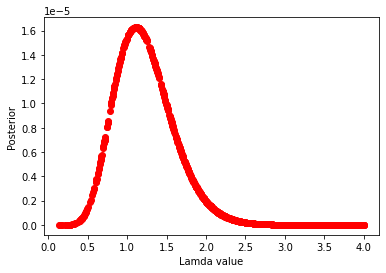

In [8]:
if __name__ == "__main__":
    main()

### Evaluation

Expected lambda value for the given input numbers is estimated to be between 1 and 1.5.